Import libraries and display data from the file

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt # data visualization 
import seaborn as sns # statistical data visualization 
# Input data files are available in the "../input/" directory. 
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory 
 
# Input data files are available in the "../input/" directory. 
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory 
 
df = pd.read_csv('car_evaluation.csv') 
 
print(df)

# preview the dataset 
 
df.head() 

      vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Exploratory data analysis 

In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'] 
df.columns = col_names 
print(df.head()) 

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc


View summary of dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Frequency distribution of values in variables 

In [11]:
for col in df.columns:
    print(df[col].value_counts()) 

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


print fequency in class 

In [12]:
print('Class values are',df['class'].value_counts())

Class values are class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


check missing values in variables

In [13]:
df.isnull().sum() 

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Declare feature vector and target variable

In [14]:
X=df.drop(['class'],axis=1) 
y=df['class'] 

In [15]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

check the shape of X_train and X_test

In [17]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

### Feature Engineering 

In [18]:
# check data types in X_train 
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

Encode categorical variables

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [1]:
# encode variables with ordinal enco 
# import category encoders
import category_encoders as ce
col=df.columns 
encoder=ce.OrdinalEncoder('col') 
X_train=encoder.fit_transform(X_train) 
X_test=encoder.fit_transform(X_test) 
print(X_train.head()) 

ModuleNotFoundError: No module named 'category_encoders'

 Decision Tree Classifier with criterion gini index 

In [2]:
from sklearn.tree import DecisionTreeClassifier 
# instantiate the DecisionTreeClassifier model with criterion gini index 
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3) 
#fit the model 
clf_gini.fit(X_train, y_train)

NameError: name 'X_train' is not defined

Predict the Test set results with criterion gini index

In [3]:
y_pred_gini=clf_gini.predict(X_test) 

NameError: name 'X_test' is not defined

In [4]:
from sklearn.metrics import accuracy_score 
print('Accuracy id {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini))) 

NameError: name 'y_test' is not defined

Compare the train-set and test-set accuracy 

In [7]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

NameError: name 'X_train' is not defined

In [6]:
print('Traning_set_accuracy is {0:0.4}'.format(accuracy_score(y_train,y_pred_train_gini))) 

NameError: name 'y_train' is not defined

Check for overfitting and underfitting

In [37]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))


Training set score: 0.7848
Test set score: 0.7263


Visualize decision-trees

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

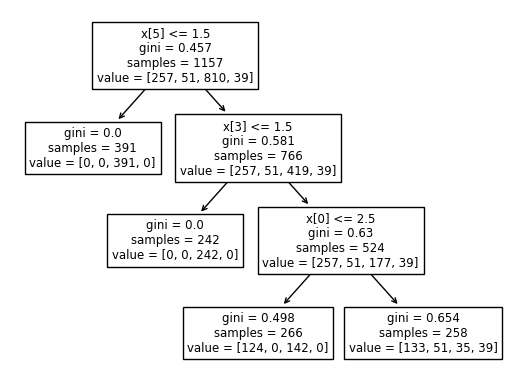

In [38]:
from sklearn import tree 
tree.plot_tree(clf_gini.fit(X_train,y_train)) 

#### Decision Tree Classifier with criterion entropy

In [40]:
# instantiate the DecisionTreeClassifier model with criterion entropy 
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model 
clf_en.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [42]:
y_pred_en = clf_en.predict(X_test)

Check accuracy score with criterion entropy

In [43]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7263


#### Compare the train-set and test-set accuracy 

In [44]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [45]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7848


#### Check for overfitting and underfitting 

In [46]:
# print the scores on training and test set 
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train))) 
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test))) 

Training set score: 0.7848
Test set score: 0.7263


Visualize decision-trees

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'entropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.758\nsamples = 258\nvalue = [133, 51, 35, 39]')]

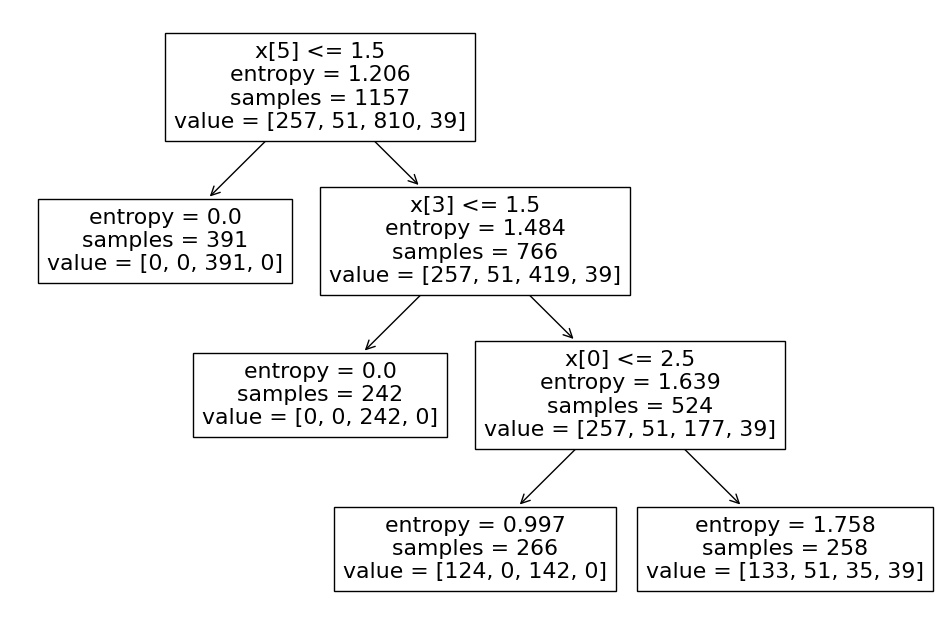

In [47]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

## Confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred_en) 
print('Confusion matrix\n\n', cm) 

Confusion matrix

 [[ 58   0  69   0]
 [ 11   0   7   0]
 [ 43   0 356   0]
 [ 17   0   9   0]]


##  Classification Report 

In [53]:
from sklearn.metrics import classification_report 
 
# print(classification_report(y_test, y_pred_en)) 

# Generate classification report with zero_division=1 (or 0)
print(classification_report(y_test, y_pred_en, zero_division=1))

              precision    recall  f1-score   support

         acc       0.45      0.46      0.45       127
        good       1.00      0.00      0.00        18
       unacc       0.81      0.89      0.85       399
       vgood       1.00      0.00      0.00        26

    accuracy                           0.73       570
   macro avg       0.81      0.34      0.33       570
weighted avg       0.74      0.73      0.69       570

